In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [7]:
# Define the number of points to generate
num_points = 1200

Iteration: 1
W = 0.008583754301071167
b = 0.47916147112846375
loss = 0.027233874425292015


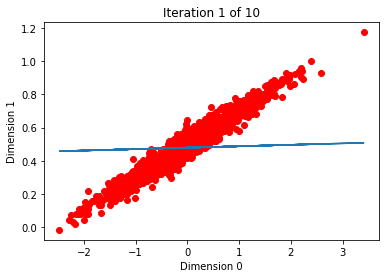

Iteration: 2
W = 0.14136874675750732
b = 0.49286285042762756
loss = 0.0039860825054347515


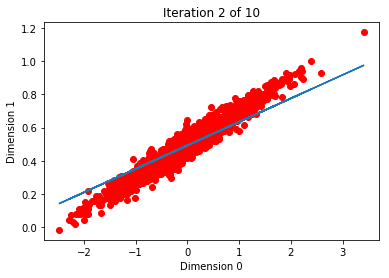

Iteration: 3
W = 0.1817609816789627
b = 0.49758684635162354
loss = 0.001828345819376409


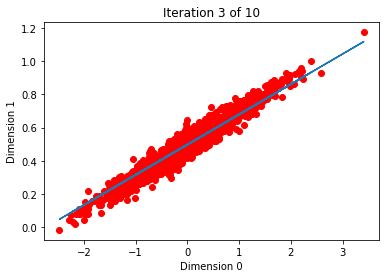

Iteration: 4
W = 0.19406777620315552
b = 0.4990238547325134
loss = 0.001628048368729651


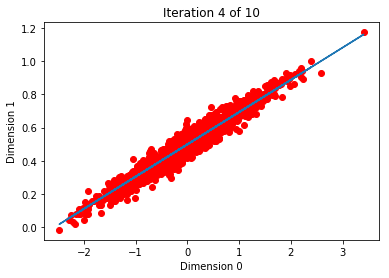

Iteration: 5
W = 0.1978173553943634
b = 0.49946171045303345
loss = 0.001609455794095993


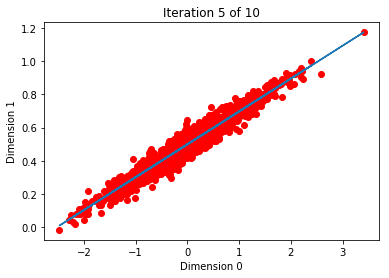

Iteration: 6
W = 0.19895976781845093
b = 0.49959510564804077
loss = 0.001607729704119265


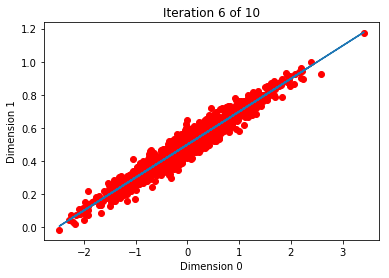

Iteration: 7
W = 0.19930782914161682
b = 0.4996357262134552
loss = 0.0016075697494670749


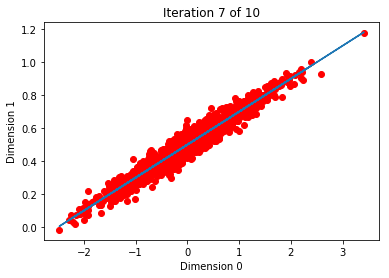

Iteration: 8
W = 0.19941388070583344
b = 0.4996481239795685
loss = 0.0016075544990599155


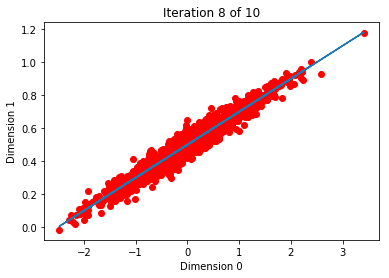

Iteration: 9
W = 0.1994461864233017
b = 0.49965187907218933
loss = 0.0016075533349066973


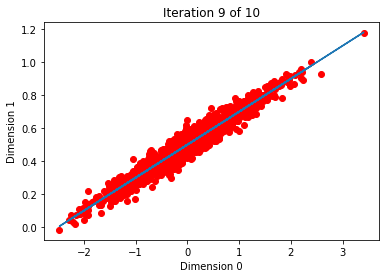

Iteration: 10
W = 0.19945603609085083
b = 0.49965304136276245
loss = 0.0016075532184913754


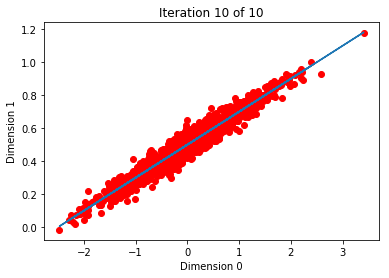

In [8]:
# Generate the data based on the equation y = mX + c
data = []
m = 0.2
c = 0.5

for i in range(num_points):
    # Generate 'X'
    X = np.random.normal(0.0, 0.8)
    
    # Generate some noise
    noise = np.random.normal(0.0, 0.04)
    
    # Compute 'y'
    y = m*X + c + noise
    data.append([X, y])

# Separate x and y
x_data = [d[0] for d in data]
y_data = [d[1] for d in data]

# Generate weight and biases
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))

# Define equation for 'y'
y = W * x_data + b

# Define how to compute the loss
loss = tf.reduce_mean(tf.square(y - y_data))

# Define the gradient descent optimizer
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

# Initialize all the variables
init = tf.global_variables_initializer()

# Start the tensorflow session and run it
sess = tf.Session()
sess.run(init)

# Start iterating
num_iterations = 10
for step in range(num_iterations):
    # Run the session
    sess.run(train)
    
    # Print the progress
    print('Iteration:', step + 1)
    print('W = {}'.format(sess.run(W)[0]))
    print('b = {}'.format(sess.run(b)[0]))
    print('loss = {}'.format(sess.run(loss)))
    
    # Plot the input data
    plt.plot(x_data, y_data, 'ro')
    
    # Plot the predicted output line
    plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
    
    # Set plotting parameters
    plt.xlabel('Dimension 0')
    plt.ylabel('Dimension 1')
    plt.title('Iteration {} of {}'.format(step + 1, num_iterations))
    plt.show()
    